In [1]:
import atlite
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import cartopy.crs as ccrs
from atlite.gis import ExclusionContainer, shape_availability

In [2]:
pip install  cdsapi --upgrade

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


  group GID_0    GID_1        COUNTRY         NAME_1  \
0     A   CIV  CIV.4_1  Côte d'Ivoire       Denguélé   
1     B   CIV  CIV.6_1  Côte d'Ivoire           Lacs   
2     C   CIV  CIV.2_1  Côte d'Ivoire  Bas-Sassandra   
3     D   CIV  CIV.1_1  Côte d'Ivoire        Abidjan   

                                            geometry  
0  MULTIPOLYGON (((-6.17337 7.66455, -6.18141 7.6...  
1  MULTIPOLYGON (((-5.29861 6.5691, -5.29801 6.57...  
2  MULTIPOLYGON (((-6.66903 4.72653, -6.66903 4.7...  
3  MULTIPOLYGON (((-3.85514 5.22736, -3.85514 5.2...  
EPSG:4326


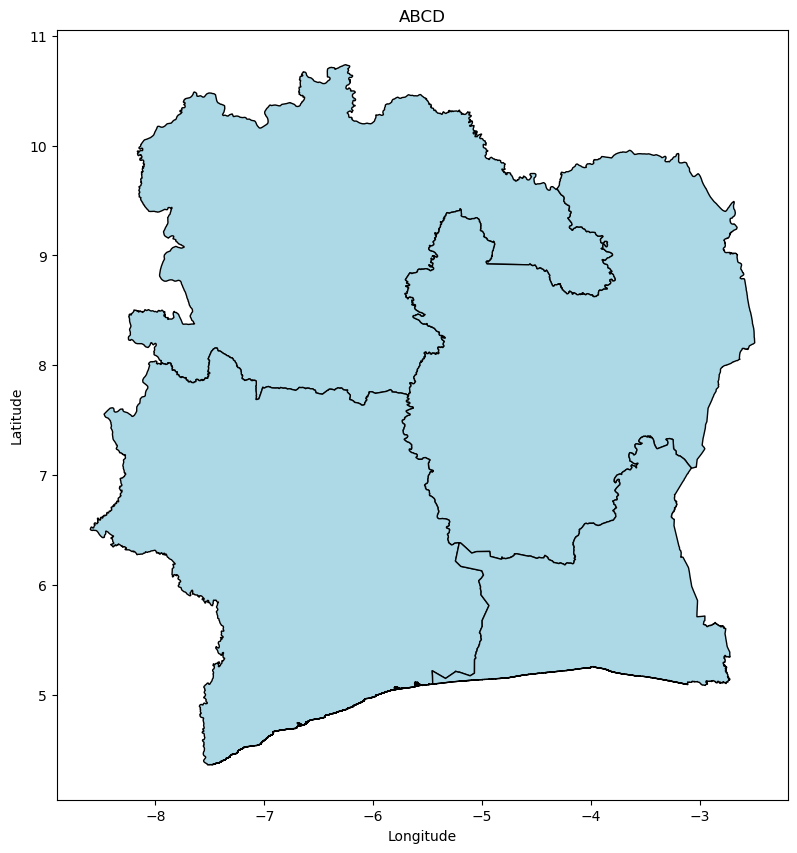

In [3]:
file_path = "4_regions.gpkg"  
ABCD = gpd.read_file(file_path)
print(ABCD)  
print(ABCD.crs)  
ABCD.plot(figsize=(10, 10), edgecolor="black", facecolor="lightblue")
plt.title("ABCD")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [4]:
minx, miny, maxx, maxy = ABCD.total_bounds
buffer = 0.25

In [5]:
cutout = atlite.Cutout(
    path="era5-2020-CIV.nc",
    module="era5",
    x=slice(minx - buffer, maxx + buffer),
    y=slice(miny - buffer, maxy + buffer),
    time="2020",
)

In [6]:
cutout.prepare(compression=None)

2025-01-27 08:05:39,268 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-01-27 08:05:39,290 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-01-27 08:05:39,291 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-01-27 08:05:44,270 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or par

<Cutout "era5-2020-CIV">
 x = -8.75 ⟷ -2.25, dx = 0.25
 y = 4.25 ⟷ 10.75, dy = 0.25
 time = 2020-01-01 ⟷ 2020-12-31, dt = h
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

In [7]:
cutout.data

<xarray.Dataset> Size: 410MB
Dimensions:               (x: 27, y: 27, time: 8784)
Coordinates:
  * x                     (x) float64 216B -8.75 -8.5 -8.25 ... -2.75 -2.5 -2.25
  * y                     (y) float64 216B 4.25 4.5 4.75 ... 10.25 10.5 10.75
  * time                  (time) datetime64[ns] 70kB 2020-01-01 ... 2020-12-3...
    lon                   (x) float64 216B dask.array<chunksize=(27,), meta=np.ndarray>
    lat                   (y) float64 216B dask.array<chunksize=(27,), meta=np.ndarray>
Data variables: (12/15)
    height                (y, x) float32 3kB dask.array<chunksize=(27, 27), meta=np.ndarray>
    wnd100m               (time, y, x) float32 26MB dask.array<chunksize=(100, 27, 27), meta=np.ndarray>
    wnd_shear_exp         (time, y, x) float32 26MB dask.array<chunksize=(100, 27, 27), meta=np.ndarray>
    wnd_azimuth           (time, y, x) float32 26MB dask.array<chunksize=(100, 27, 27), meta=np.ndarray>
    roughness             (time, y, x) float32 26MB dask.array<chunksize=(100, 27, 27), meta=np.ndarray>
    influx_toa            (time, y, x) float32 26MB dask.array<chunksize=(100, 27, 27), meta=np.ndarray>
    ...                    ...
    solar_altitude        (time, y, x) float64 51MB dask.array<chunksize=(100, 27, 27), meta=np.ndarray>
    solar_azimuth         (time, y, x) float64 51MB dask.array<chunksize=(100, 27, 27), meta=np.ndarray>
    temperature           (time, y, x) float32 26MB dask.array<chunksize=(100, 14, 14), meta=np.ndarray>
    soil temperature      (time, y, x) float32 26MB dask.array<chunksize=(100, 14, 14), meta=np.ndarray>
    dewpoint temperature  (time, y, x) float32 26MB dask.array<chunksize=(100, 14, 14), meta=np.ndarray>
    runoff                (time, y, x) float32 26MB dask.array<chunksize=(100, 27, 27), meta=np.ndarray>
Attributes:
    module:                  era5
    prepared_features:       ['runoff', 'temperature', 'height', 'influx', 'w...
    chunksize_time:          100
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-26T17:37 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
cutout.prepared_features

module  feature    
era5    height                       height
        wind                        wnd100m
        wind                  wnd_shear_exp
        wind                    wnd_azimuth
        wind                      roughness
        influx                   influx_toa
        influx                influx_direct
        influx               influx_diffuse
        influx                       albedo
        influx               solar_altitude
        influx                solar_azimuth
        temperature             temperature
        temperature        soil temperature
        temperature    dewpoint temperature
        runoff                       runoff
dtype: object

In [9]:
AREA_CRS = "ESRI:54009"  # special for africa

In [10]:
def plot_area(masked, transform, shape):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = show(masked, transform=transform, cmap="Greens", vmin=0, ax=ax)
    shape.plot(ax=ax, edgecolor="k", color="None", linewidth=1)

In [11]:
excluder_wind_onshore = ExclusionContainer(crs=AREA_CRS, res=300)
fn = "PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-CI.tif"
excluder_wind_onshore.add_raster(fn, codes=[50], buffer=1000, crs=4326)
excluder_wind_onshore.add_raster(fn, codes=[20, 30, 40, 60], crs=4326, invert=True)
fn = "WDPA_Oct2022_Public_shp-CIV.tif"
excluder_wind_onshore.add_raster(fn, crs=3035)
fn = "GEBCO_2014_2D-CI.nc"
excluder_wind_onshore.add_raster(fn, codes=lambda x: x >10, crs=4326, invert=True)
excluder_wind_onshore.add_raster(fn, codes=lambda x: x >2000, crs=4326)
fn = "ne_10m_airports.gpkg"
excluder_wind_onshore.add_geometry(fn, buffer=10000)
fn = "ne_10m_roads.gpkg"
excluder_wind_onshore.add_geometry(fn, buffer=300)

In [12]:
excluder_solar = ExclusionContainer(crs=AREA_CRS, res=300)
fn = "PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-CI.tif"
excluder_solar.add_raster(fn, codes=[50], buffer=1000, crs=4326)
excluder_solar.add_raster(fn, codes=[20, 30, 40, 60], crs=4326, invert=True)
fn = "WDPA_Oct2022_Public_shp-CIV.tif"
excluder_solar.add_raster(fn, crs=3035)

In [13]:
masked_1, transform_1 = shape_availability(ABCD.to_crs(AREA_CRS).geometry, excluder_wind_onshore)

In [14]:
masked_2, transform_2 = shape_availability(ABCD.to_crs(AREA_CRS).geometry, excluder_solar)

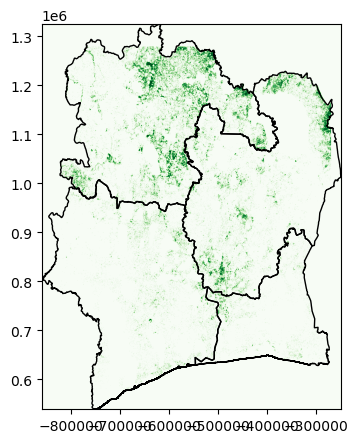

In [15]:
plot_area(masked_1, transform_1, ABCD.to_crs(AREA_CRS).geometry)

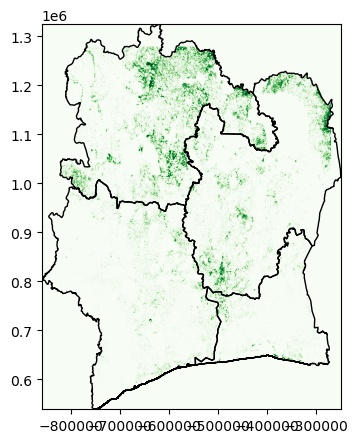

In [16]:
plot_area(masked_2, transform_2, ABCD.to_crs(AREA_CRS).geometry)

In [17]:
ABCD.index = ABCD.group
print(ABCD)

      group GID_0    GID_1        COUNTRY         NAME_1  \
group                                                      
A         A   CIV  CIV.4_1  Côte d'Ivoire       Denguélé   
B         B   CIV  CIV.6_1  Côte d'Ivoire           Lacs   
C         C   CIV  CIV.2_1  Côte d'Ivoire  Bas-Sassandra   
D         D   CIV  CIV.1_1  Côte d'Ivoire        Abidjan   

                                                geometry  
group                                                     
A      MULTIPOLYGON (((-6.17337 7.66455, -6.18141 7.6...  
B      MULTIPOLYGON (((-5.29861 6.5691, -5.29801 6.57...  
C      MULTIPOLYGON (((-6.66903 4.72653, -6.66903 4.7...  
D      MULTIPOLYGON (((-3.85514 5.22736, -3.85514 5.2...  


In [18]:
cutout = atlite.Cutout("era5-2020-CIV.nc")

In [19]:
A_wind_on_shore = cutout.availabilitymatrix(ABCD, excluder_wind_onshore)
A_solar = cutout.availabilitymatrix(ABCD, excluder_solar)

In [20]:
import xarray as xr
cap_per_sqkm = 3  # MW/km2

area = cutout.grid.set_index(["y", "x"]).to_crs(AREA_CRS).area / 1e6

area = xr.DataArray(area, dims=("spatial"))

capacity_matrix_wind_on_shore = A_wind_on_shore.stack(spatial=["y", "x"]) * area * cap_per_sqkm
capacity_matrix_solar = A_solar.stack(spatial=["y", "x"]) * area * cap_per_sqkm

In [21]:
wind = cutout.wind(
    atlite.windturbines.Vestas_V112_3MW,
    matrix=capacity_matrix_wind_on_shore,
    index=ABCD.index,
    per_unit=True,
)

C:\Users\18263\anaconda3\envs\esm-ws-24-25\Lib\site-packages\atlite\resource.py:90: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.15.
  warnings.warn(msg, FutureWarning)


In [22]:
wind.to_pandas().head()

group,A,B,C,D
time,,,,
2020-01-01 00:00:00,0.166150,0.106018,0.040451,0.007954
2020-01-01 01:00:00,0.172816,0.109675,0.040474,0.010271
2020-01-01 02:00:00,0.176686,0.108063,0.026544,0.007141
2020-01-01 03:00:00,0.169282,0.111990,0.011163,0.002792
2020-01-01 04:00:00,0.161394,0.127721,0.001217,0.000973


In [23]:
pv = cutout.pv(
    panel=atlite.solarpanels.CdTe,
    matrix=capacity_matrix_solar,
    orientation="latitude_optimal",
    index=ABCD.index,
    per_unit=True,
)

In [24]:
pv.to_pandas().head()

group,A,B,C,D
time,,,,
2020-01-01 00:00:00,0.0,0.0,0.0,0.0
2020-01-01 01:00:00,0.0,0.0,0.0,0.0
2020-01-01 02:00:00,0.0,0.0,0.0,0.0
2020-01-01 03:00:00,0.0,0.0,0.0,0.0
2020-01-01 04:00:00,0.0,0.0,0.0,0.0
